In [1]:
# NA values removed and 0 values for localization column removed.

# preliminaries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

exome = pd.read_excel("HC-JSexomes_2_output_1percentExAC_Corrected.xlsx")
exome.head

<bound method NDFrame.head of                                     File Name Chromosome   Position  \
0      JS_8505_UG.recalSNPs_Indels_output.txt          1     957898   
1      JS_8505_UG.recalSNPs_Indels_output.txt          1     977133   
2                   8138Trio.final_output.txt          1     977406   
3                   8501Trio.final_output.txt          1     978668   
4                     8079-3.final_output.txt          1     981869   
5                   8084Trio.final_output.txt          1     981869   
6                   8138Trio.final_output.txt          1     981869   
7                     8168-3.final_output.txt          1     981869   
8                    8182Duo.final_output.txt          1     981869   
9                   8187Trio.final_output.txt          1     981869   
10                    8212-3.final_output.txt          1     981869   
11                    8212-4.final_output.txt          1     981869   
12                  8216Trio.final_output.txt  

In [2]:
exomeFiltered = exome.loc[:, ['GERP','CADD_PHRED_score', 'AB', 'P1_AltFreq', 'P2_AltFreq' ,'localization', 'js_cause']]

In [3]:
exome.shape

(24280, 41)

In [4]:
exomeLoc = exomeFiltered.loc[:,['GERP','CADD_PHRED_score', 'AB', 'P1_AltFreq', 'P2_AltFreq', 'localization']]
exomeJS = exomeFiltered.loc[:,['GERP','CADD_PHRED_score', 'AB', 'P1_AltFreq', 'P2_AltFreq', 'js_cause']]
exomeTest = exomeFiltered.loc[:,['GERP','CADD_PHRED_score', 'AB', 'P1_AltFreq', 'P2_AltFreq']]
exomeTest.shape

(24280, 5)

array([ 0.89745938,  0.99869461,  0.99937574,  0.99970461,  1.        ])

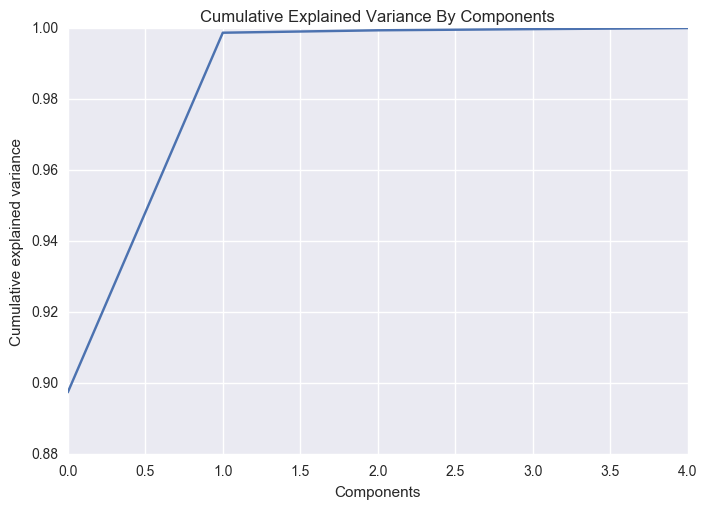

In [5]:
#PCA portion of the analysis
eigenVariant = PCA()
eigenVariant.fit(exomeTest)

plt.plot(np.cumsum(eigenVariant.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance By Components')
np.cumsum(eigenVariant.explained_variance_ratio_)

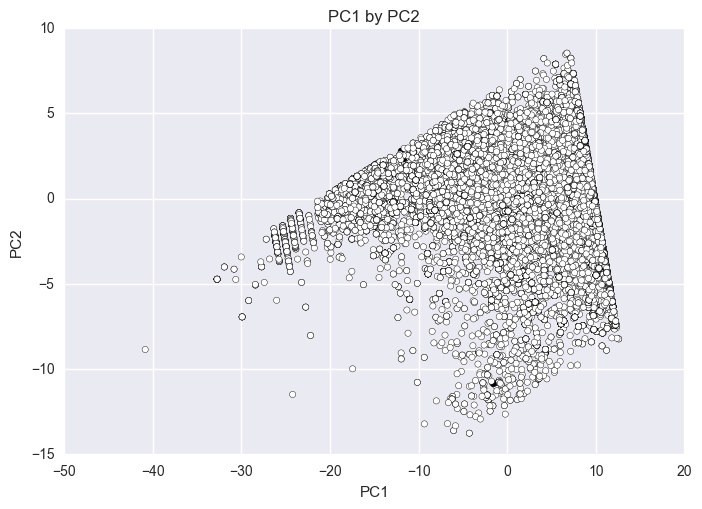

In [6]:
#PC plot colored by js_cause
variants_red = eigenVariant.transform(exomeTest)
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), c=exome['js_cause'])
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

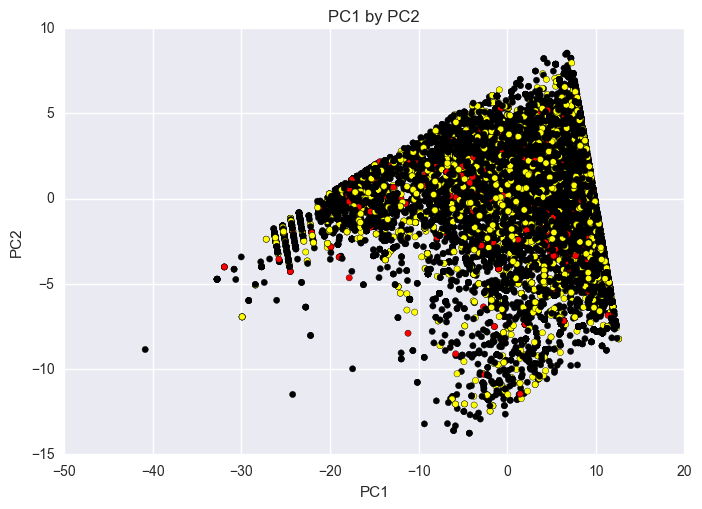

In [7]:
#PC plot colored by localization
variants_red = eigenVariant.transform(exomeTest)
exomeColor = exome['localization'].replace([1,2,3],['red','yellow','black'])
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), c= exomeColor)
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

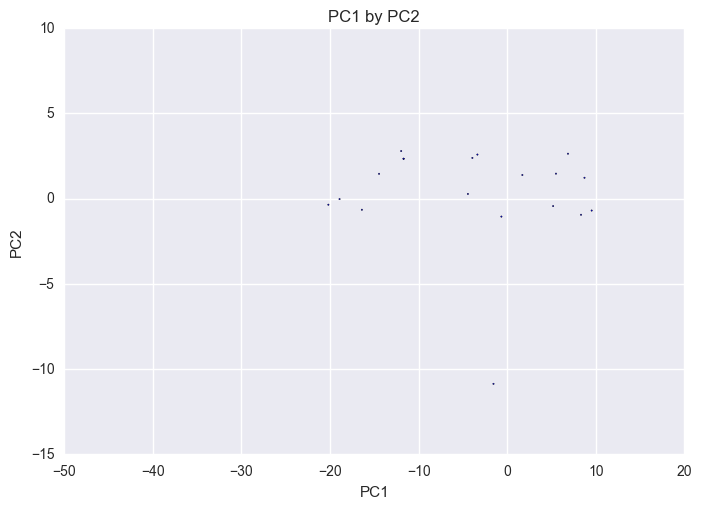

In [8]:
#PC plot with only JS causative variants. They are all black, which makes sense because they should all localize to the cilium. 
variants_red = eigenVariant.transform(exomeTest)
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), exome['js_cause']==1)
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

[3 3 3 ..., 3 3 3]


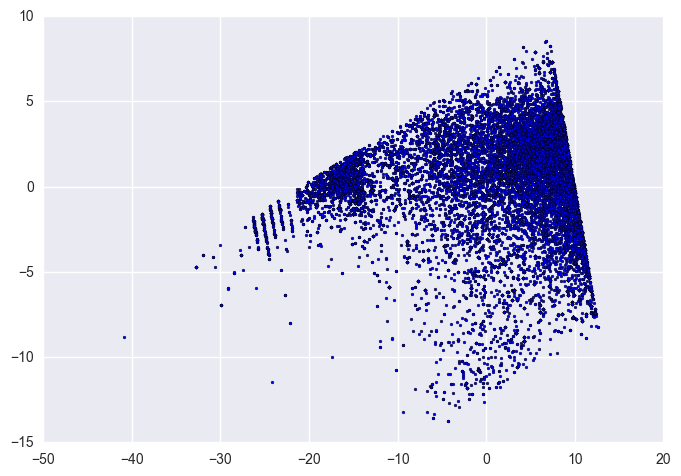

In [9]:
#LDA with localization data
model = LinearDiscriminantAnalysis()

X = variants_red[:,[0,1]]
y = exome['localization']

model.fit(X, y)

predicted = model.predict(X)

print(predicted)

for loco in set(predicted):
    plt.scatter(X[predicted==loco,0], X[predicted==loco,1], s=4)

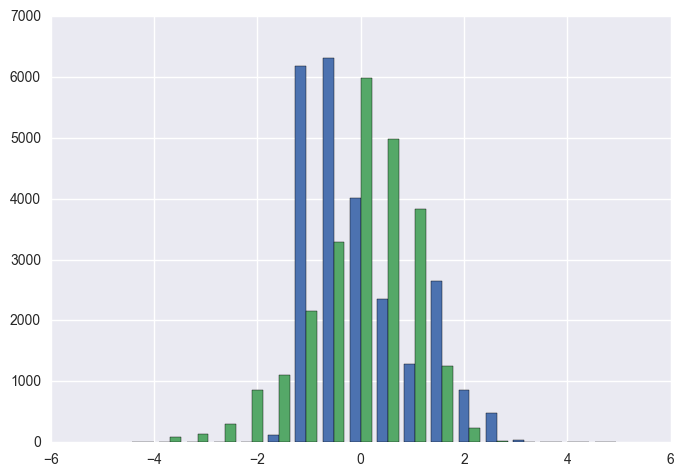

In [10]:
X_new = model.transform(X)

for loco in set(predicted):
    plt.hist(X_new[predicted==loco], bins=np.linspace(-5,5,20)) 

[0 0 0 ..., 0 0 0]


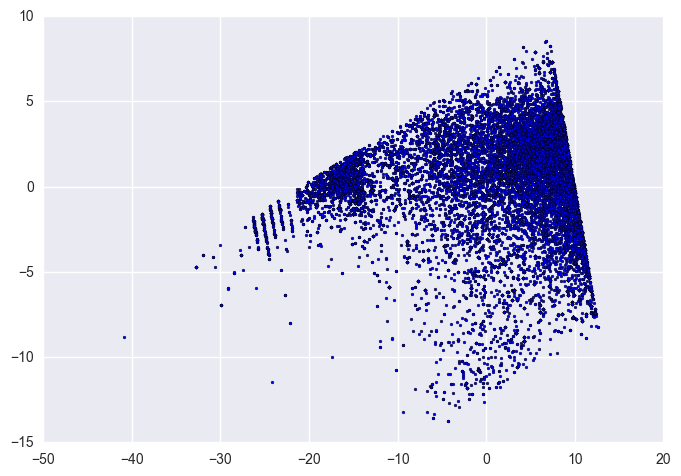

In [11]:
#LDA with JS data
model = LinearDiscriminantAnalysis()

X = variants_red[:,[0,1]]
y = exome['js_cause']

model.fit(X, y)

predicted = model.predict(X)

print(predicted)

for JS in set(predicted):
    plt.scatter(X[predicted==JS,0], X[predicted==JS,1], s=4)

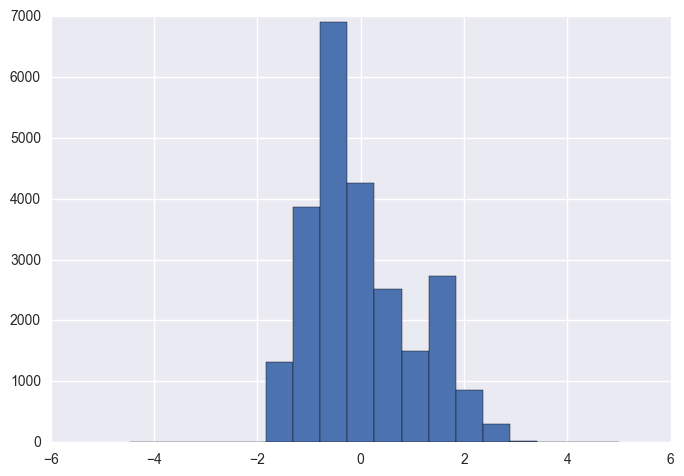

In [13]:
X_new = model.transform(X)

for loco in set(predicted):
    plt.hist(X_new[predicted==loco], bins=np.linspace(-5,5,20)) 

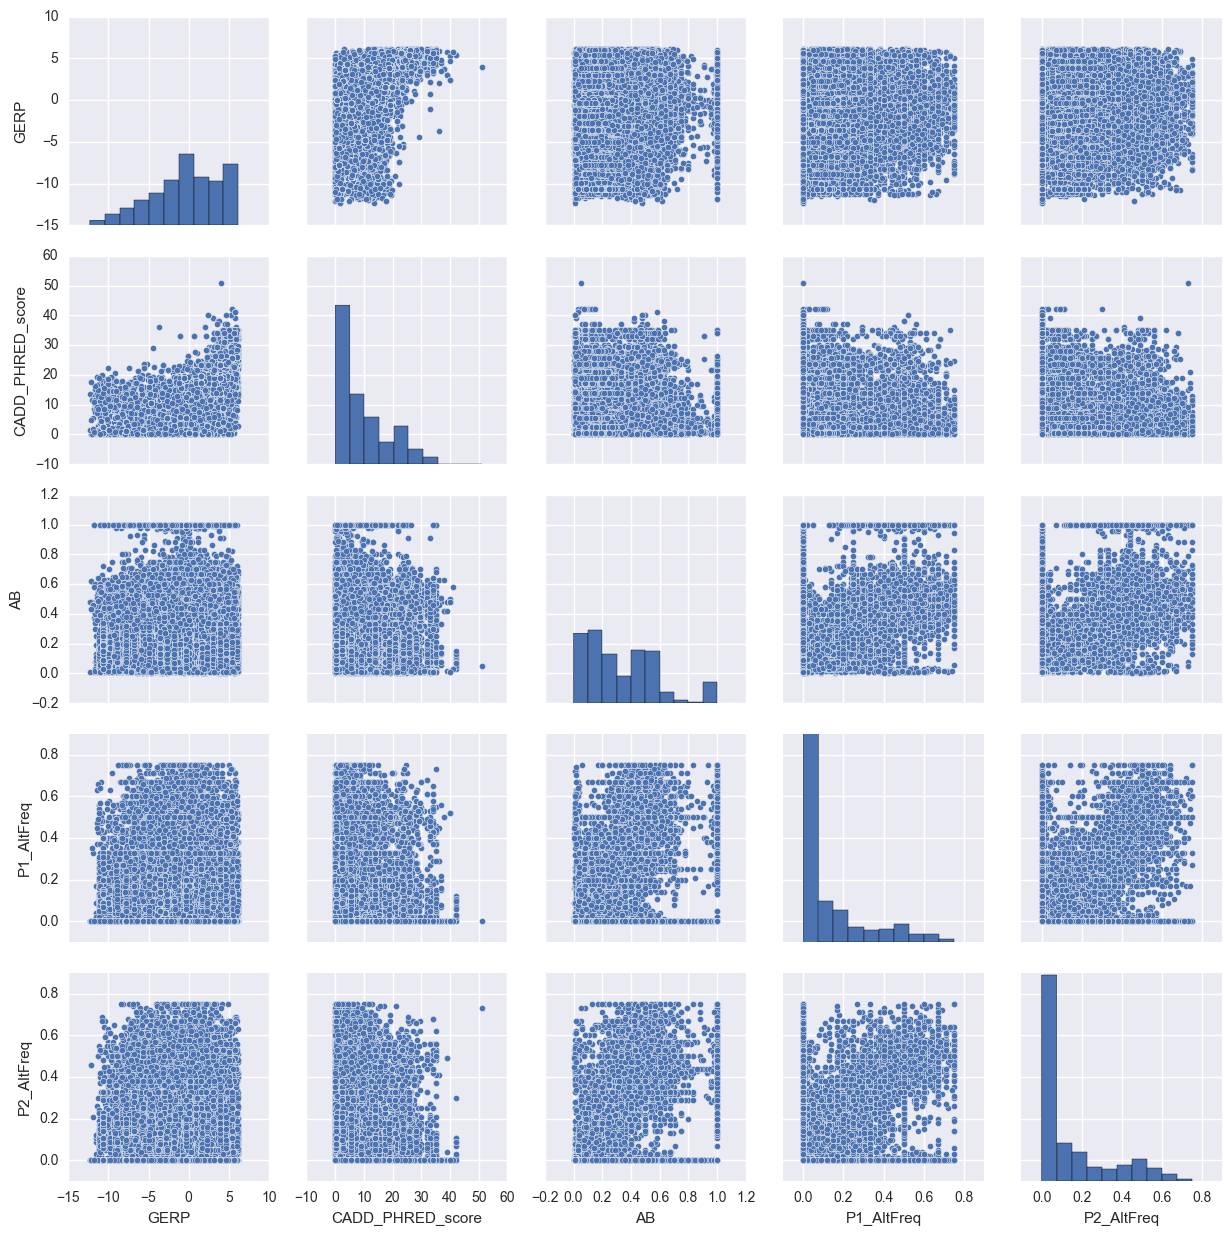

In [14]:
sns.pairplot(exomeTest)

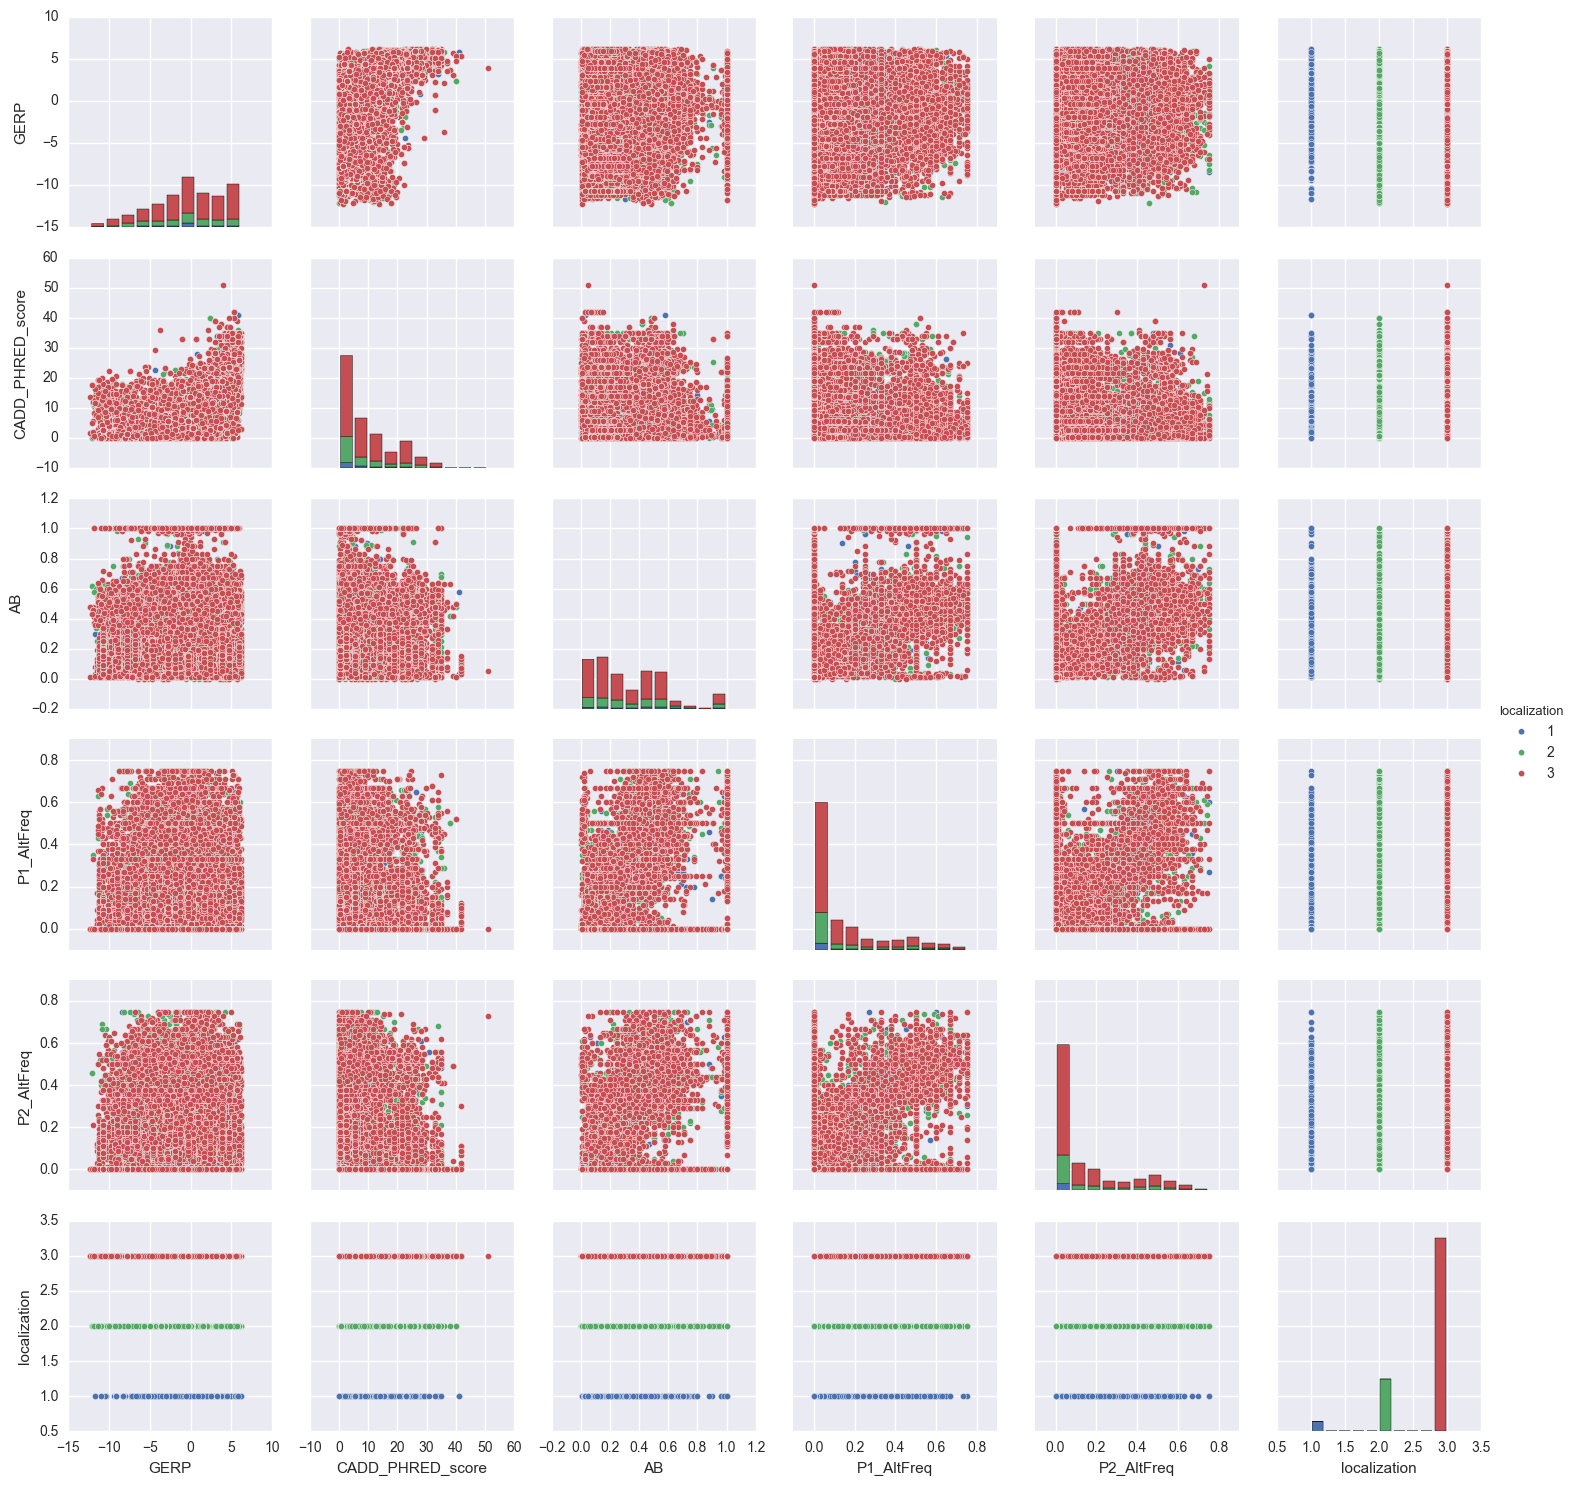

In [15]:
sns.pairplot(exomeLoc, hue = 'localization')

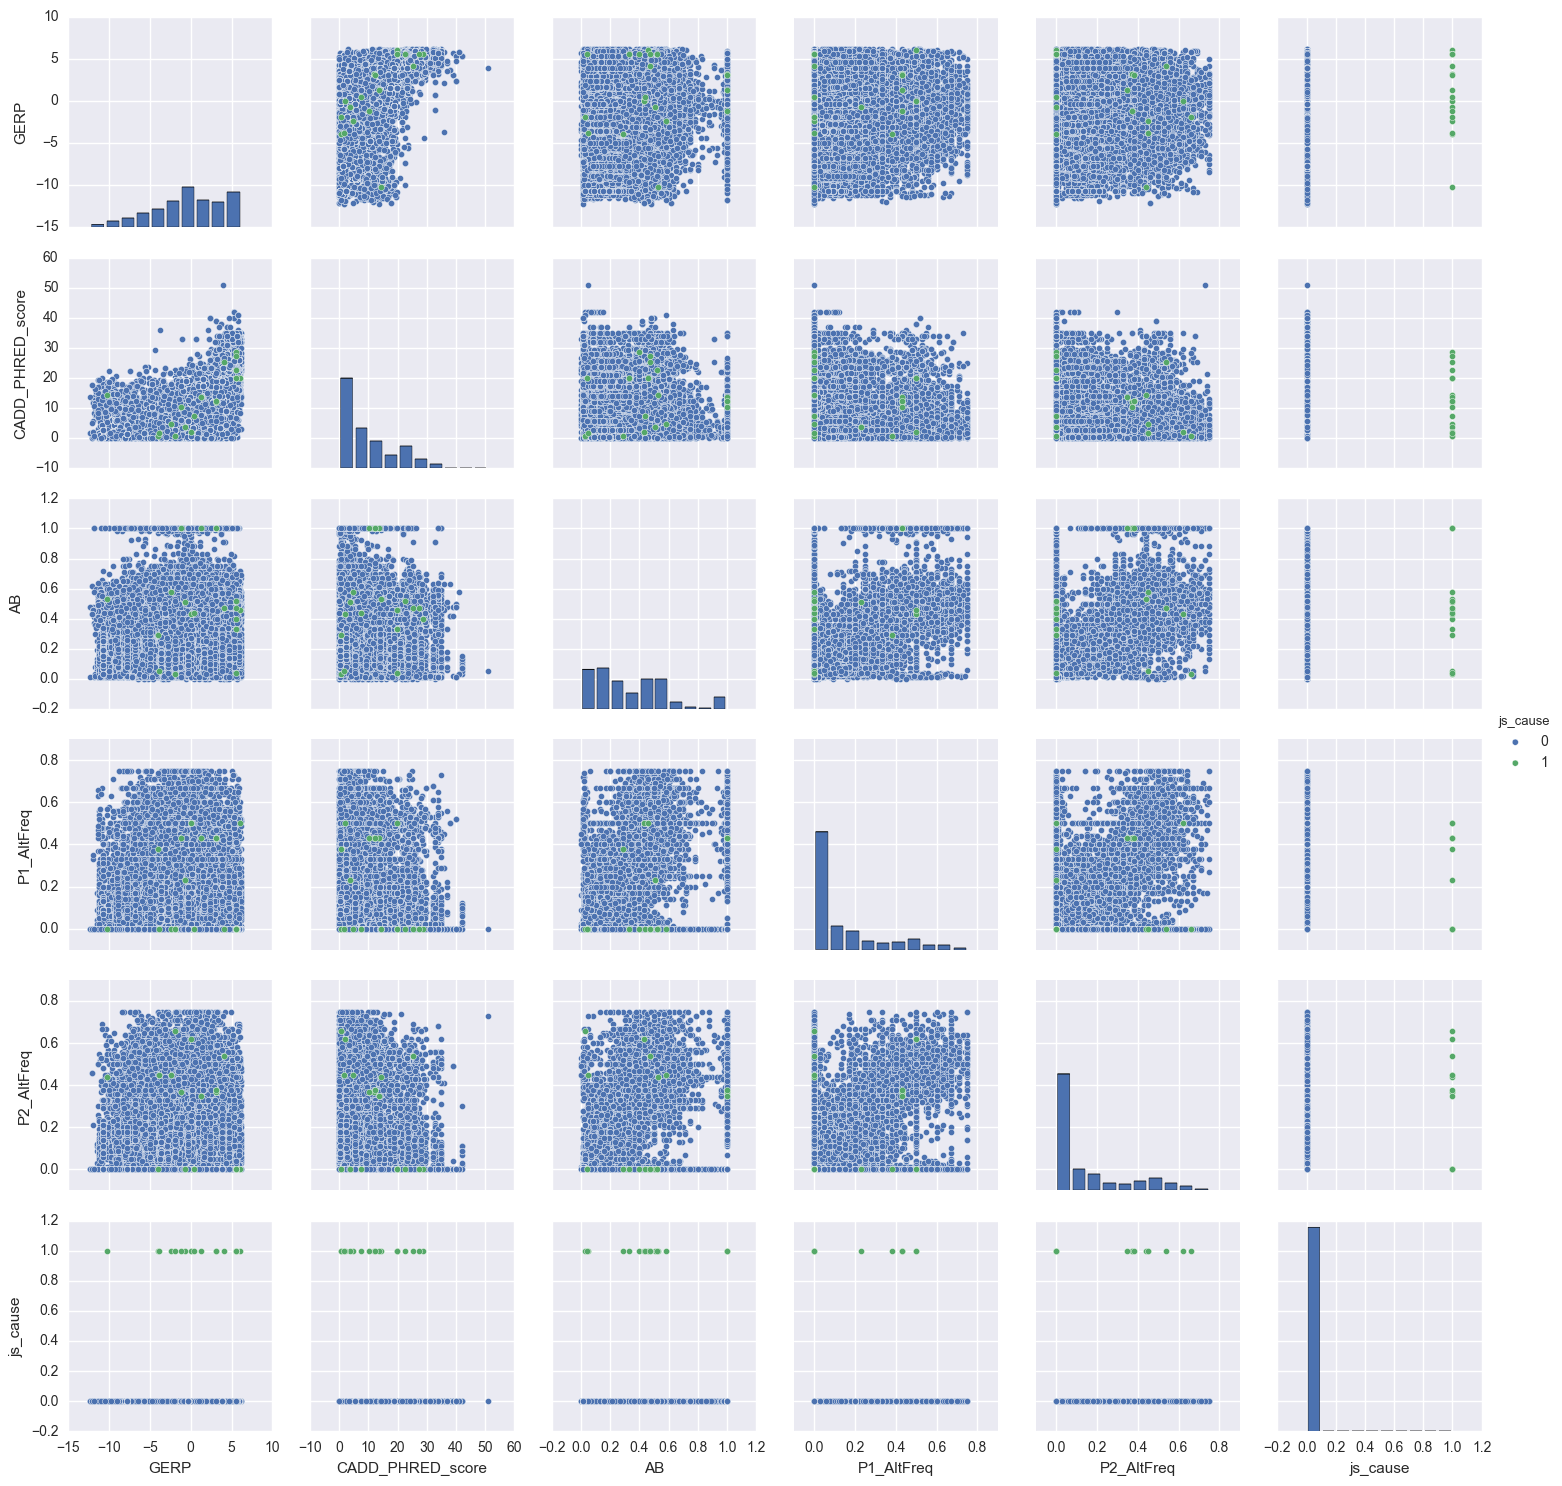

In [16]:
sns.pairplot(exomeJS, hue = 'js_cause')

In [17]:
#Do KNN here

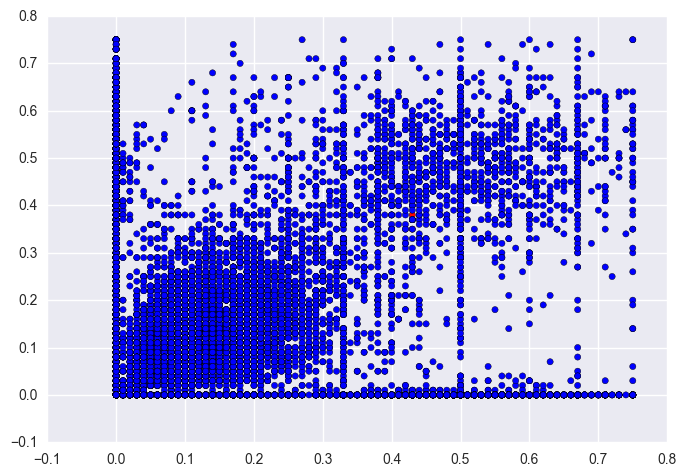

In [18]:
exomeJSColor = exomeJS['js_cause'].replace([0,1],['blue','red'])
plt.scatter(exomeJS['P1_AltFreq'], exomeJS['P2_AltFreq'], c= exomeJSColor)
#'P1_AltFreq', 'P2_AltFreq', 'js_cause'

In [19]:
plt.scatter(exomeJS['P1_AltFreq'], exomeJS['P2_AltFreq'], exomeJS['js_cause']==1)

In [22]:
np.unique(exome['Position'])

array([   176169,    209293,    209586, ..., 246091459, 246091465,
       246518263], dtype=int64)

In [33]:
len(set(exome['Position']))

9736

In [34]:
z = exome['localization']

In [31]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(4)
model.fit(X, y)

# define a function for fitting model, plotting the points, and 
# visualizing the decision boundary of the classifier
def plot_classifier_regions(model, X, y):
    G = np.unique(y)
    
    markers = ['o', 's', '>', '']
    for c, i in zip(G, range(len(G))):
        plt.plot(X[y==c, 0], 
                 X[y==c, 1], 
                 markers[c])
    
    xlim = [X[:, 0].min()-0.5, X[:, 0].max()+0.5]
    ylim = [X[:, 1].min()-0.5, X[:, 1].max()+0.5]    
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    model.fit(X, y)
    
    # compute and plot boundaries
    h = 0.01
    xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], h),
                         np.arange(ylim[0], ylim[1], h))
    
    if hasattr(model, 'decision_function'):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='magma', alpha=.8)
    
    return model

In [32]:
knn_model = plot_classifier_regions(KNeighborsClassifier(1), X, y)

C:\Users\hankc\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Users\hankc\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


C:\Users\hankc\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Users\hankc\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


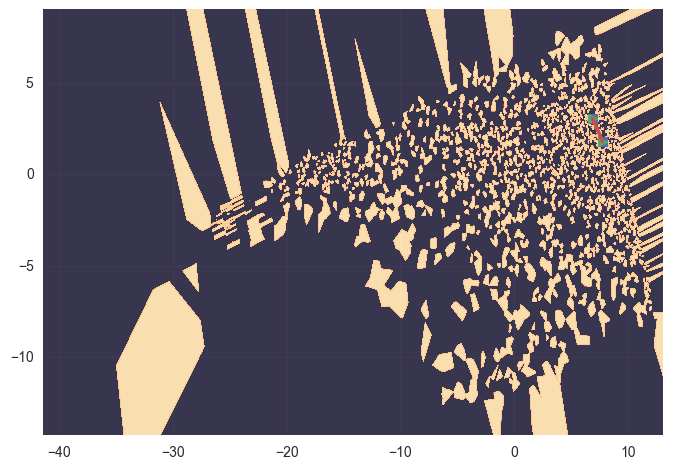

In [35]:
knn_model = plot_classifier_regions(KNeighborsClassifier(1), X, z)